# Agrupamiento de Promedios K (ML No Supervisado) 

-La "K" en K-Means representa el número específico de clusters que se deben identificar en el conjunto de datos. Este número es definido por el usuario.

-En K-Means, un centroide es el punto central de un cluster, calculado como el promedio de todos los puntos asignados al cluster, representando la posición "media" de todos ellos en el espacio del dataset.

-El parámetro random_state se usa para inicializar el generador de números aleatorios que controla la selección de los puntos iniciales de los centroides, asegurando así que los resultados sean consistentes entre diferentes ejecuciones

-En K-Means, etiquetas es un array que contiene las asignaciones de cada punto de datos al cluster correspondiente basado en la proximidad al centroide más cercano. Cada etiqueta representa el grupo al cual ha sido asignado el dato en función de su cercanía a los centroides calculados.

In [10]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [4]:
np.random.seed(42) #Números aleatorios
data = np.random.rand(100,2)
data

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [5]:
#Entreno modelo de KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

/Users/leidygarciaguzman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [6]:
centroides = kmeans.cluster_centers_
centroides

array([[0.12006068, 0.90489563],
       [0.72913446, 0.22729438],
       [0.780568  , 0.70944531],
       [0.25571519, 0.19875171],
       [0.22739621, 0.59428412]])

In [8]:
etiquetas = kmeans.labels_
etiquetas #Asigna valos de las 5 etiquetas 

array([0, 2, 3, 0, 2, 0, 1, 3, 4, 3, 1, 3, 4, 4, 1, 1, 0, 2, 3, 1, 4, 0,
       4, 4, 1, 2, 2, 2, 3, 3, 3, 1, 4, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3, 2,
       2, 4, 2, 2, 1, 3, 4, 4, 1, 4, 3, 3, 2, 2, 1, 2, 2, 3, 4, 2, 4, 3,
       3, 1, 2, 0, 1, 1, 3, 2, 3, 1, 4, 1, 2, 4, 4, 2, 0, 3, 4, 1, 1, 1,
       1, 1, 3, 2, 4, 2, 1, 0, 2, 3, 2, 2], dtype=int32)

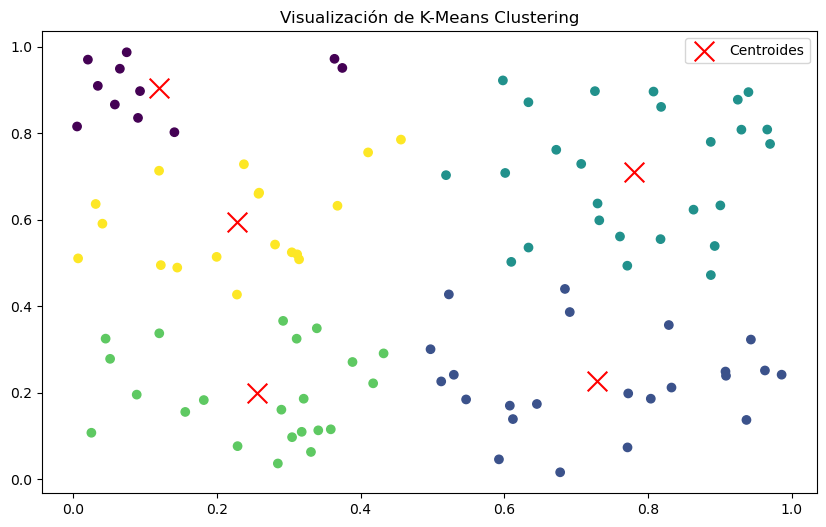

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], c=etiquetas, cmap='viridis', marker='o')
plt.scatter(centroides[:,0], centroides[:,1], c='red', marker='x', s=200, label='Centroides')
plt.title('Visualización de K-Means Clustering')
plt.legend();

# Dataset pinguinos

In [12]:
pinguinos = sns.load_dataset('penguins')
pinguinos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
pinguinos.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [14]:
pinguinos.index

RangeIndex(start=0, stop=344, step=1)

In [15]:
pinguinos.shape

(344, 7)

In [16]:
#Verifico si tiene nulos 
pinguinos.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [17]:
#Elimino los nulos
pinguinos.dropna(inplace=True)
pinguinos.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [18]:
data = pinguinos[['bill_length_mm', 'bill_depth_mm']]

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

/Users/leidygarciaguzman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [20]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

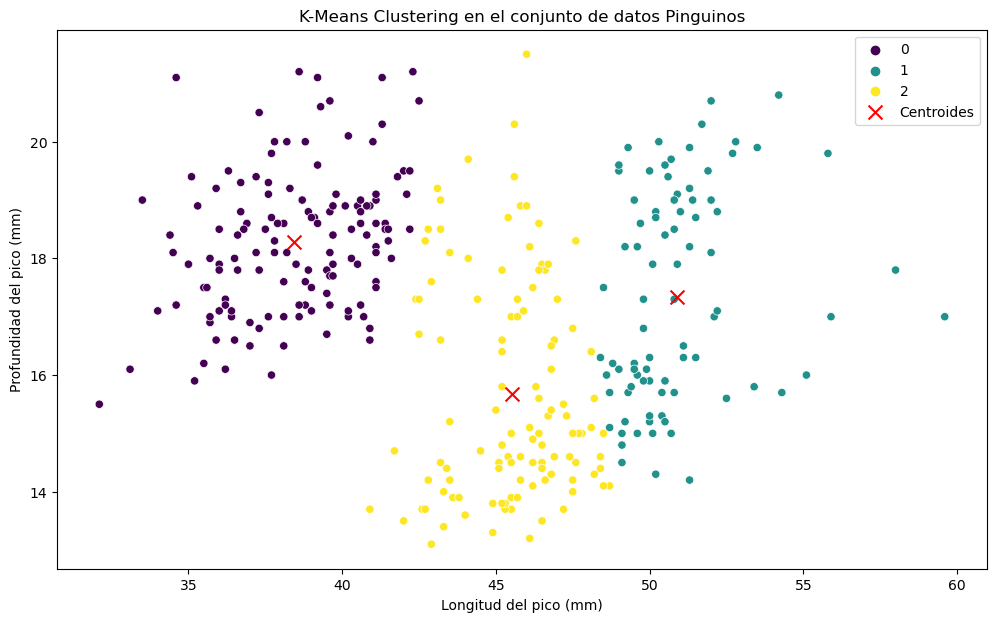

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pinguinos, 
                x='bill_length_mm', 
                y='bill_depth_mm', 
                hue=etiquetas, 
                palette='viridis')
plt.scatter(centroides[:,0],centroides[:,1], c='red', s=100, marker='x', label='Centroides')
plt.title('K-Means Clustering en el conjunto de datos Pinguinos')
plt.legend()
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Profundidad del pico (mm)');

# Ejercicio de repaso

In [28]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans


In [31]:
np.random.seed(42)
datos=np.random.rand(100,2)
datos

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.